In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_excel(r'C:\Users\Sourav\OneDrive\Desktop\Healthcare Data Analysis project/Medicare Inpatient 2017.xlsx',sheet_name = 'Medicare Inpatient 2017')
data1.head(4)

,DRG Definition,Provider Id,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,28,117117.78570,25823.71429,24057.392860
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,32,98357.56250,20688.34375,19791.406250
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,11,69153.54546,11811.18182,8194.363636
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,12,100427.33330,19134.00000,18154.000000


In [3]:
data2 = pd.read_excel(r'C:\Users\Sourav\OneDrive\Desktop\Healthcare Data Analysis project/Medicare Inpatient 2017.xlsx',sheet_name = 'Providers')
data2.head(4)

,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,AL - Dothan


In [4]:
df = pd.merge(data1,data2,on='Provider Id')

In [5]:
df.head(3)

,DRG Definition,Provider Id,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,28,117117.78570,25823.71429,24057.392860,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,32,98357.56250,20688.34375,19791.406250,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,11,69153.54546,11811.18182,8194.363636,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,196325.0,256061.085690,151405.498703,10001.000000,110076.000000,240115.000000,380040.00000,6.701220e+05
Total Discharges,196325.0,37.604421,57.259325,11.000000,14.000000,21.000000,39.00000,4.255000e+03
Average Covered Charges,196325.0,61166.151208,73014.115449,2644.777778,24123.140350,40121.523810,70908.55556,3.325523e+06
Average Total Payments,196325.0,13978.194700,14800.590340,2497.888889,6509.441558,9658.380952,15496.27273,5.157067e+05
Average Medicare Payments,196325.0,11816.235001,13230.938068,0.000000,5133.818182,8041.960784,13089.96875,4.915097e+05
Provider Zip Code,196325.0,47296.735790,27998.859025,1040.000000,25301.000000,44035.000000,72205.00000,9.980100e+04


In [7]:
df.dtypes

DRG Definition                                 object
Provider Id                                     int64
Total Discharges                                int64
Average Covered Charges                       float64
Average Total Payments                        float64
Average Medicare Payments                     float64
Provider Name                                  object
Provider Street Address                        object
Provider City                                  object
Provider State                                 object
Provider Zip Code                               int64
Hospital Referral Region (HRR) Description     object
dtype: object

In [8]:
drg_split = df['DRG Definition'].str.split(' - ',expand = True)
drg_split

,0,1
0,023,CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE CNS...
1,025,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...
2,027,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...
3,037,EXTRACRANIAL PROCEDURES W MCC
4,038,EXTRACRANIAL PROCEDURES W CC
...,...,...
196320,683,RENAL FAILURE W CC
196321,690,KIDNEY & URINARY TRACT INFECTIONS W/O MCC
196322,871,SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W...
196323,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...


In [9]:
drg_split[0]

0         023
1         025
2         027
3         037
4         038
         ... 
196320    683
196321    690
196322    871
196323    470
196324    871
Name: 0, Length: 196325, dtype: object

In [10]:
df['DRG Code'] = drg_split[0]
df['DRG Description'] = drg_split[1]

In [11]:
df.head(3)

,DRG Definition,Provider Id,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,DRG Code,DRG Description
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,28,117117.78570,25823.71429,24057.392860,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,023,CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE CNS...
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,32,98357.56250,20688.34375,19791.406250,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,025,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,11,69153.54546,11811.18182,8194.363636,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,027,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...


<AxesSubplot:xlabel='Provider State'>

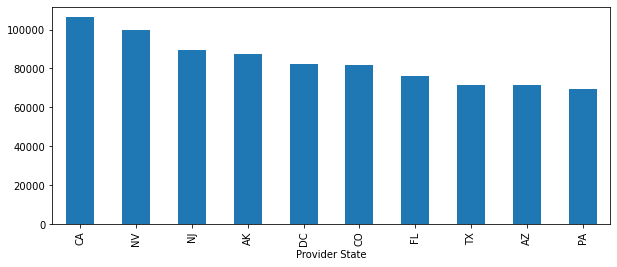

In [12]:
#States ranked by highest average hospital charges

av_charges_state = df.groupby('Provider State').mean()['Average Covered Charges']
av_charges_state.sort_values(ascending = False).head(10).round(2).plot.bar(figsize=(10,4))

<AxesSubplot:xlabel='Provider State'>

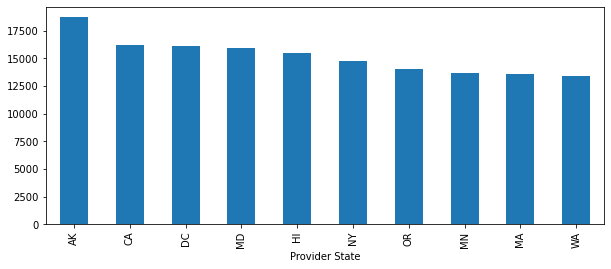

In [13]:
#States ranked by highest average Medicare payments

av_payments_state = df.groupby('Provider State').mean()['Average Medicare Payments']
av_payments_state.sort_values(ascending = False).head(10).round(2).plot.bar(figsize=(10,4))

In [14]:
#Most common hospital discharges

df.groupby('DRG Description').sum()['Total Discharges'].sort_values(ascending = False).head(10)

DRG Description
SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                    597736
MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    510632
HEART FAILURE & SHOCK W MCC                                           359442
CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC                           215525
PULMONARY EDEMA & RESPIRATORY FAILURE                                 165613
SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC                  157851
ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                155843
KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             138497
RENAL FAILURE W CC                                                    134011
G.I. HEMORRHAGE W CC                                                  131163
Name: Total Discharges, dtype: int64

In [15]:
#Ten most expensive Medicare medical conditions treated in hospitals

df.groupby('DRG Description').mean()['Average Covered Charges'].sort_values(ascending = False).head(10)

DRG Description
HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC               1.032058e+06
LUNG TRANSPLANT                                                        6.122821e+05
ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.    6.061637e+05
LIVER TRANSPLANT W MCC OR INTESTINAL TRANSPLANT                        5.512770e+05
ALLOGENEIC BONE MARROW TRANSPLANT                                      4.017339e+05
SPINAL FUS EXC CERV W SPINAL CURV/MALIG/INFEC OR EXT FUS W MCC         3.934285e+05
COMBINED ANTERIOR/POSTERIOR SPINAL FUSION W MCC                        3.768284e+05
CARDIAC DEFIB IMPLANT W CARDIAC CATH W AMI/HF/SHOCK W MCC              3.760350e+05
TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.          3.630658e+05
SIMULTANEOUS PANCREAS/KIDNEY TRANSPLANT                                3.612517e+05
Name: Average Covered Charges, dtype: float64

In [55]:
#Variation of medicare payments for heart implant or implant of heart assist system surgery

grouped = df[df['DRG Description'] == 'HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC']
grouped.head(3)

,DRG Definition,Provider Id,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,DRG Code,DRG Description
937,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,13,901043.8462,273737.2308,121763.3077,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,001,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...
6863,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,19,463703.5790,226998.6316,164459.6842,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,001,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...
9563,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,40114,34,744050.0882,162530.1177,160234.8824,BAPTIST HEALTH MEDICAL CENTER-LITTLE ROCK,"9601 INTERSTATE 630, EXIT 7",LITTLE ROCK,AR,72205,AR - Little Rock,001,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...


In [80]:
grouped_min = grouped.groupby('Provider State').min()[['Average Medicare Payments']]
grouped_max = grouped.groupby('Provider State').max()[['Average Medicare Payments']]
grouped_combine = pd.merge(grouped_min,grouped_max, on = 'Provider State')
grouped_combine.columns = ['Min. medicare payment','Max. medicare payment']

grouped_combine['Medicare Pay Diff'] = grouped_combine['Max. medicare payment'] - grouped_combine['Min. medicare payment']
grouped_combine.sort_values(by = 'Medicare Pay Diff', ascending = False).head(10)

,Min. medicare payment,Max. medicare payment,Medicare Pay Diff
Provider State,,,
CA,216492.8462,491509.6774,275016.8312
NY,195809.3929,409049.7059,213240.3130
FL,166695.7273,291850.5333,125154.8060
TX,174752.2667,297563.2353,122810.9686
PA,178909.4286,273023.6111,94114.1825
IL,211519.3125,294862.8438,83343.5313
VA,176552.8571,249688.7222,73135.8651
NC,180447.0000,229434.7059,48987.7059
OH,198105.0909,241805.6875,43700.5966


In [82]:
#Charges and reimbursement rates (payment) relation

ratio = df.groupby('Provider State').mean()[['Average Covered Charges','Average Medicare Payments']].sort_values(
    by='Average Covered Charges' ,ascending = False)

ratio['Charges to payment ratio'] = ratio['Average Covered Charges']/ratio['Average Medicare Payments']

ratio.sort_values(by='Charges to payment ratio' ,ascending = False).head(10)

,Average Covered Charges,Average Medicare Payments,Charges to payment ratio
Provider State,,,
NV,100019.046115,12379.644455,8.079315
FL,76246.905777,10058.557887,7.580302
NJ,89597.930693,12579.441416,7.122568
TX,71748.631495,10635.212033,6.746328
CA,106406.986129,16207.739145,6.565196
CO,81883.652141,12584.928794,6.506485
PA,69332.765453,10922.258484,6.347841
AL,54725.169047,8706.915487,6.285253
SC,60684.470740,10361.162609,5.856917


In [33]:
#Average charges to payment ratio

ratio['Charges to payment ratio'].mean(axis = 0)

4.626262476836806

<AxesSubplot:>

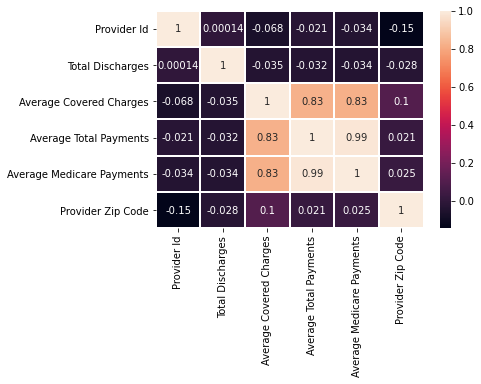

In [17]:
#Correlation 

sns.heatmap(df.corr(),annot=True,linewidths=1)

# High correlations between Average Coverage Charges and Average Medicare Payments